# Visualization
This notebook contains the code for all plots in the paper.

In [1]:
# DEPENDENCIES
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormaps
import matplotlib.lines as mlines  # custom artist for legend across different axes
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
import seaborn as sns

# OTHER USEFUL STUFF
# matplotlib default colour palette (Vega category 10 palette)
# can also be accessed with strings "C0", "C1", etc,
# but this is more comfortable for the dendrogram colouring
mpl_def_col_pal = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# unify plot sizes
plot_w = 8
plot_h = plot_w / 2

# independent variables
IVs = ["popsize", "host", "memsize", "numskills"]

## Population size converging variation
The input for this plot is the output of the `popsize_solo` experiment in the Netlogo model's BehaviorSpace experiments, cleaned with the `clean_nl_csv()` function in `data_wrangling.jl()`.
Values are means of 25 runs.
The three data points at 2000, 2500, and 3000 were computed separately.

In [2]:
df = pd.read_csv("netlogo_output/popsize_siglen.csv")
df.head()

max_pop_size   sig_len    stddev
0           100  3.400405  0.440534
1           110  4.659784  0.487020
2           120  4.264155  0.510706
3           130  4.241522  1.428653
4           140  5.453127  0.238402

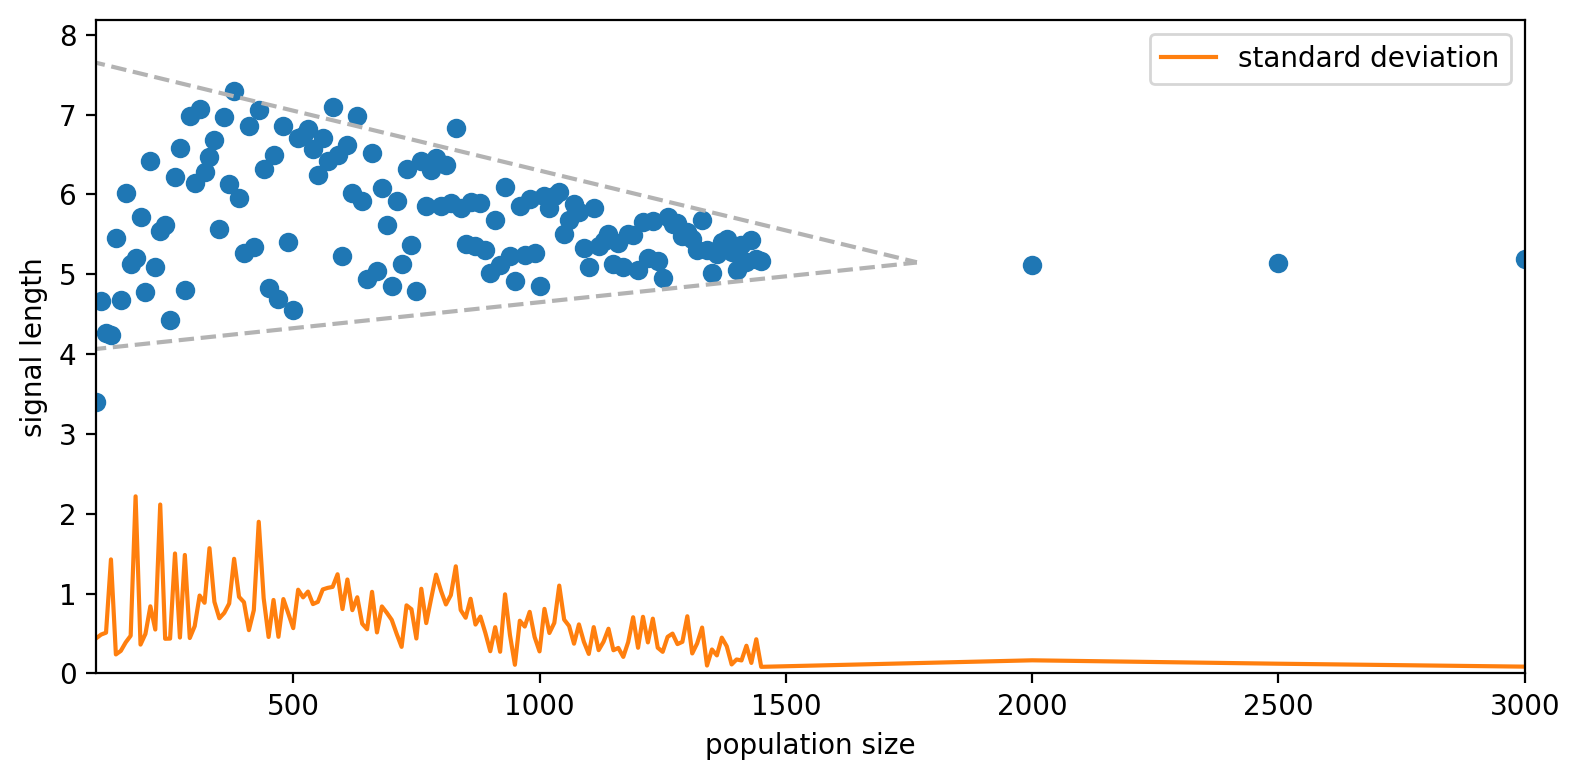

In [3]:
fig, ax = plt.subplots(figsize=(plot_w, plot_h), dpi=200)

ax.plot(df["max_pop_size"], df["sig_len"], lw=0, marker="o")
ax.plot(df["max_pop_size"], df["stddev"], label="standard deviation")

# grey lines
x = np.array([0, 1766])
y1 = 7.8-0.0015*x
y2 = 4+0.00065*x
ax.plot(x, y1, ls="--", c="0.7")
ax.plot(x, y2, ls="--", c="0.7")

ax.legend()

ax.set(
    xlabel="population size",
    ylabel="signal length",
    xlim=(100, 3000),
    ylim=(0,None),
)

plt.tight_layout()

plt.show()

## Effects on signal length
The input for this plot is the output of the `hostility_solo` and `memory_solo` experiments in the Netlogo model's BehaviorSpace experiments, cleaned with the `clean_nl_csv()` function in `data_wrangling.jl()`.
Some unused columns have been removed.

In [4]:
# load data
df_mem = pd.read_csv("netlogo_output/memory_solo_clean.csv")
df_host = pd.read_csv("netlogo_output/hostility_solo_clean.csv")
df_mem.head()  # `df_host` is equivalent

memory_mean   sig_len
0            1  0.360000
1            1  0.430000
2            1  0.376667
3            1  0.320000
4            1  0.551667

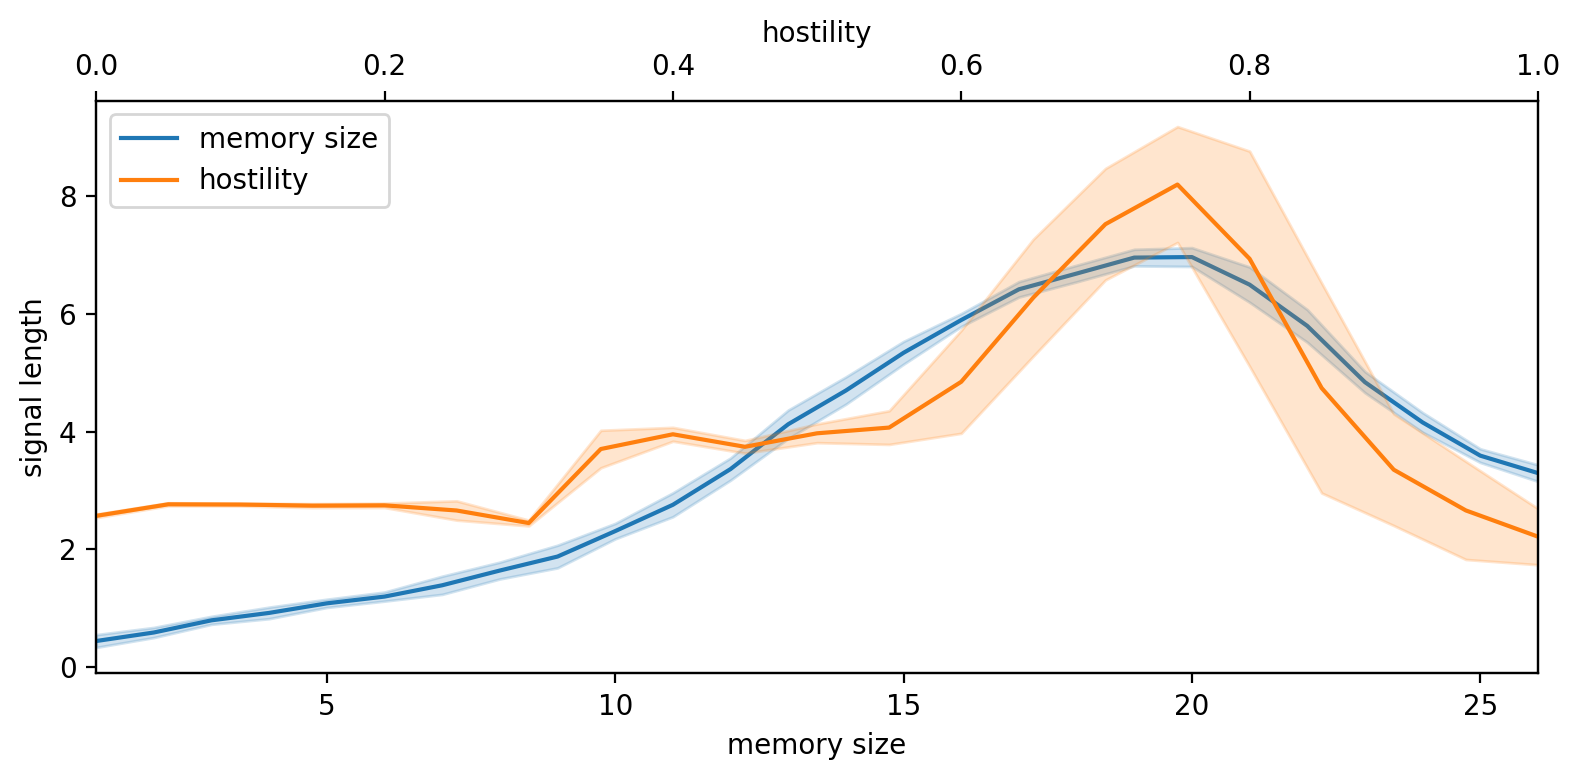

In [5]:
# initialise plot and axes
fig, ax1 = plt.subplots(figsize=(plot_w, plot_h), dpi=200)
ax2 = ax1.twiny()

# do actual plotting
sns.lineplot(data=df_mem, x="memory_mean", y="sig_len",
             color="C0",
             ci="sd",  # ribbon standard deviation
             ax=ax1,
            )
sns.lineplot(data=df_host, x="hostility_mean", y="sig_len",
             color="C1",
             ci="sd",
             ax=ax2,
            )

# set limits and labels
ax1.set(
    xlim=(1, 26),
    xlabel="memory size",
    ylabel="signal length"
)
ax2.set(
    xlim=(0, 1),
    xlabel="hostility"
)

# get legend across both axes done
lab1 = mlines.Line2D([], [], color="C0", label="memory size")
lab2 = mlines.Line2D([], [], color="C1", label="hostility")
plt.legend(handles=[lab1, lab2], loc="upper left")

# wrap up and save
plt.tight_layout()

plt.show()

## Effects on population size
The input for this plot is the output of the `memory_solo` experiment in the Netlogo model's BehaviorSpace experiments with a very high value for `max-pop-size` (~ 100000), cleaned with the `clean_nl_csv()` function in `data_wrangling.jl()`.

In [6]:
# load data
df = pd.read_csv("netlogo_output/memsize_popsize.csv")
df.head()

memory_mean  pop_size
0            0       153
1            1       181
2            2       176
3            3       175
4            4       178

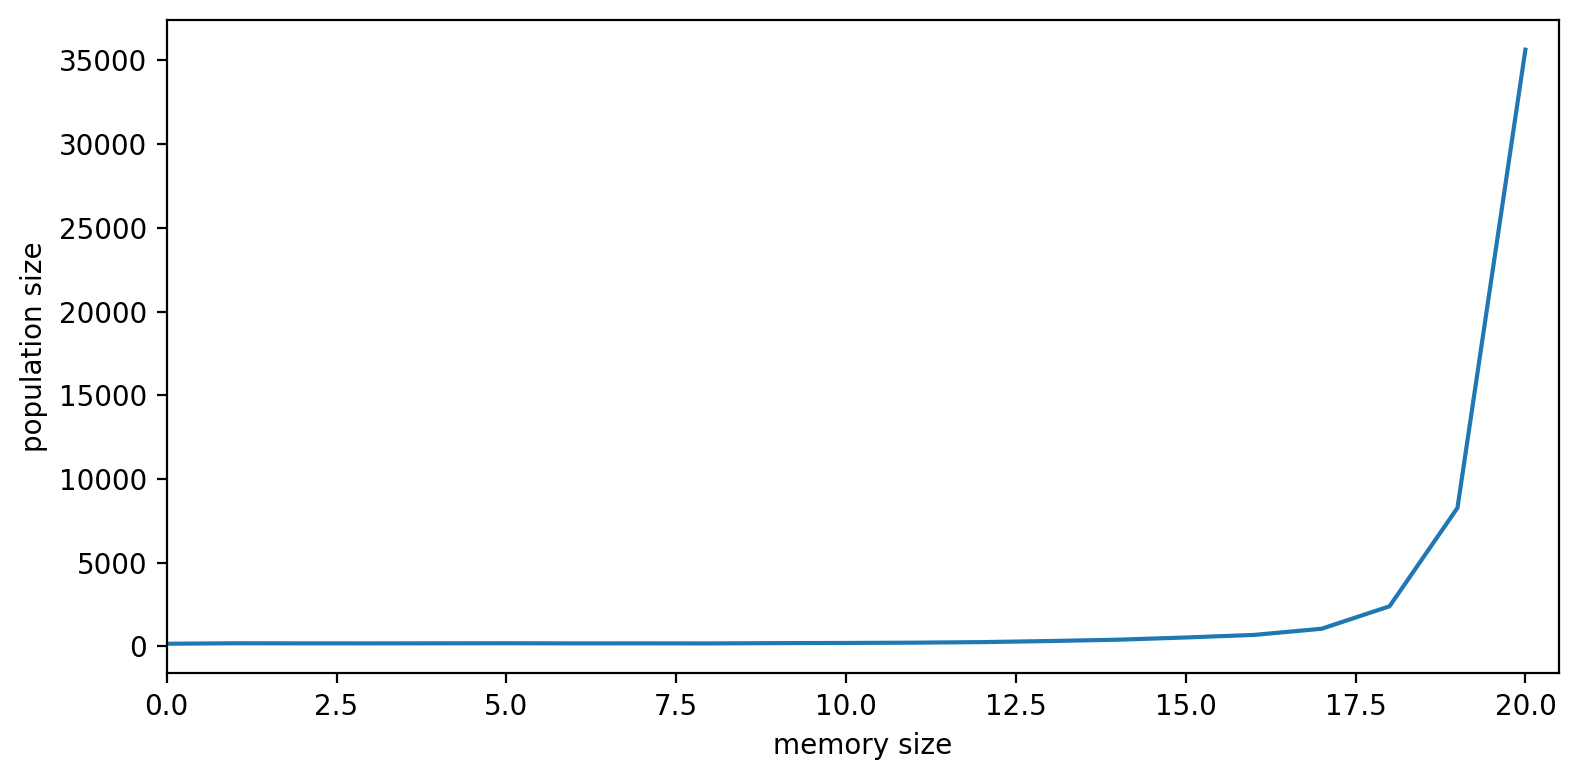

In [7]:
fig, ax = plt.subplots(figsize=(plot_w, plot_h), dpi=200)

sns.lineplot(
    data=df, x="memory_mean", y="pop_size",
    color="C0",
    ax=ax,
)

ax.set(
    xlabel="memory size",
    ylabel="population size",
    xlim=(0,20.5),
)

plt.tight_layout()
plt.show()

## Longest segment
The input for this plot is explained in `longest_dist_metric.ipynb`.

In [8]:
# load data
df = pd.read_csv("netlogo_output/df_segments.csv")
df.head()

popsize  host  memsize  numskills  maxsegment
0      700   0.6       21         41    0.062693
1      300   0.0       21         61    0.051827
2      100   0.2        1          1    0.000000
3      100   0.0       81         21    0.379019
4      900   0.8        1         61    0.000000

In [9]:
# DATA WRANGLING
# remove rows where the longest segment =1 or =0
# this happened a few times in very small populations with very small vocabulary
df = df[df["maxsegment"] != 0]
df = df[df["maxsegment"] != 1]

step = 0.02  # control x-axis resolution
x = np.arange(0, 1.1, step)

y_IVs = []
# iterate over IVs
for IV in IVs:
    y_IV = []
    # sort the data into bins of length `step` (=0.02)
    for i in range(len(x)-1):
        df_temp = df[df["maxsegment"] > x[i]]
        df_temp = df_temp[df_temp["maxsegment"] < x[i+1]]
        v = df_temp[IV].mean()
        y_IV.append(v)
    y_IVs.append(y_IV)

# normalise to ]0,1[ interval
for i in range(len(y_IVs[0])):
    y_IVs[0][i] /= 900
    y_IVs[2][i] /= 81
    y_IVs[3][i] /= 81

# correct x-offset
x = x + step / 2
x = x[:-1]

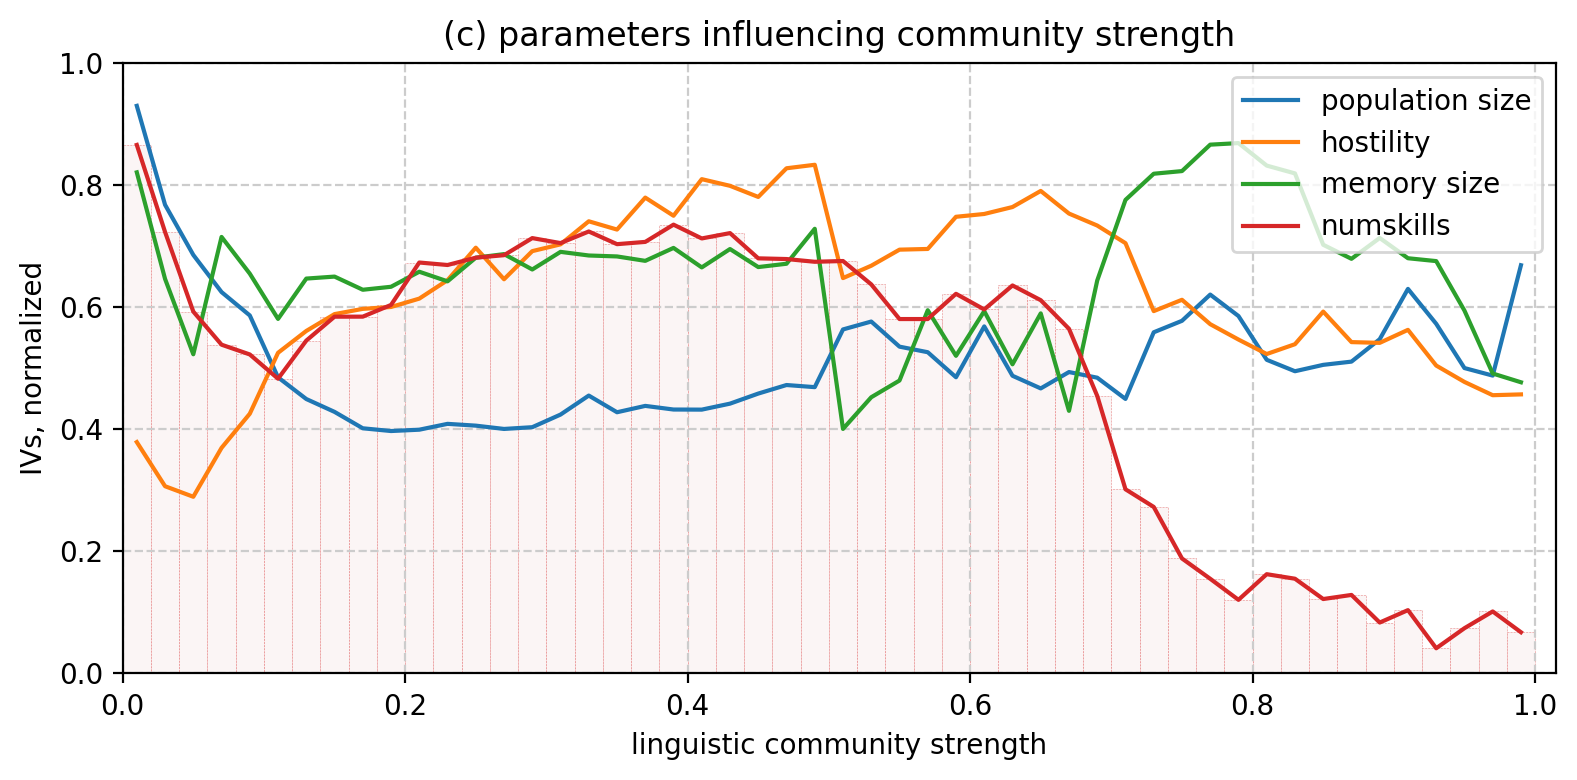

In [10]:
# ACTUAL PLOTTING
fig, ax = plt.subplots(figsize=(plot_w, plot_h),  dpi=200)

# line plots
for i in range(len(y_IVs)):
    ax.plot(x, y_IVs[i])

# transparent bar plot
ax.bar(x, y_IVs[3], width=step, color="#fbf5f5", edgecolor="C3", lw=0.2, ls="dotted")

# add legend
ax.legend(["population size", "hostility", "memory size", "numskills"])

# add labels, title, etc
ax.set(
    title="(c) parameters influencing community strength",
    xlabel="linguistic community strength",
    ylabel="IVs, normalized",
    xlim=(0, 1.015),
    ylim=(0, 1),
)

# add grid
ax.grid(True, ls="--", c="0.8")

plt.tight_layout()
plt.show()

## Dendrograms explaining longest segment metric
This plot uses random data.

In [11]:
# HELPER FUNCTIONS

def normalize_distances(Z):
    """
    normalises distances for dendrogram to ]0, 1[
    """
    max_clust_dist = max([i[2] for i in Z])
    for i in Z:
        i[2] /= max_clust_dist
    return Z


def longest_segment(dendline):
    """
    returns tuple of start and end of longest segment
    """
    ms = 0.0
    ms_start = -1
    ms_end = -1
    for i  in range(len(dendline)-1):
        s = dendline[i+1] - dendline[i]
        if s > ms:
            ms = s
            ms_start = dendline[i]
            ms_end = dendline[i+1]
    return (ms_start, ms_end)


def link_color_func(old_col):
    """
    map ugly dendrogram colours to default matplotlib colours
    """
    if old_col == "b":
        return "C0"
    elif old_col == "r":
        return "C1"
    elif old_col == "g":
        return "C2"

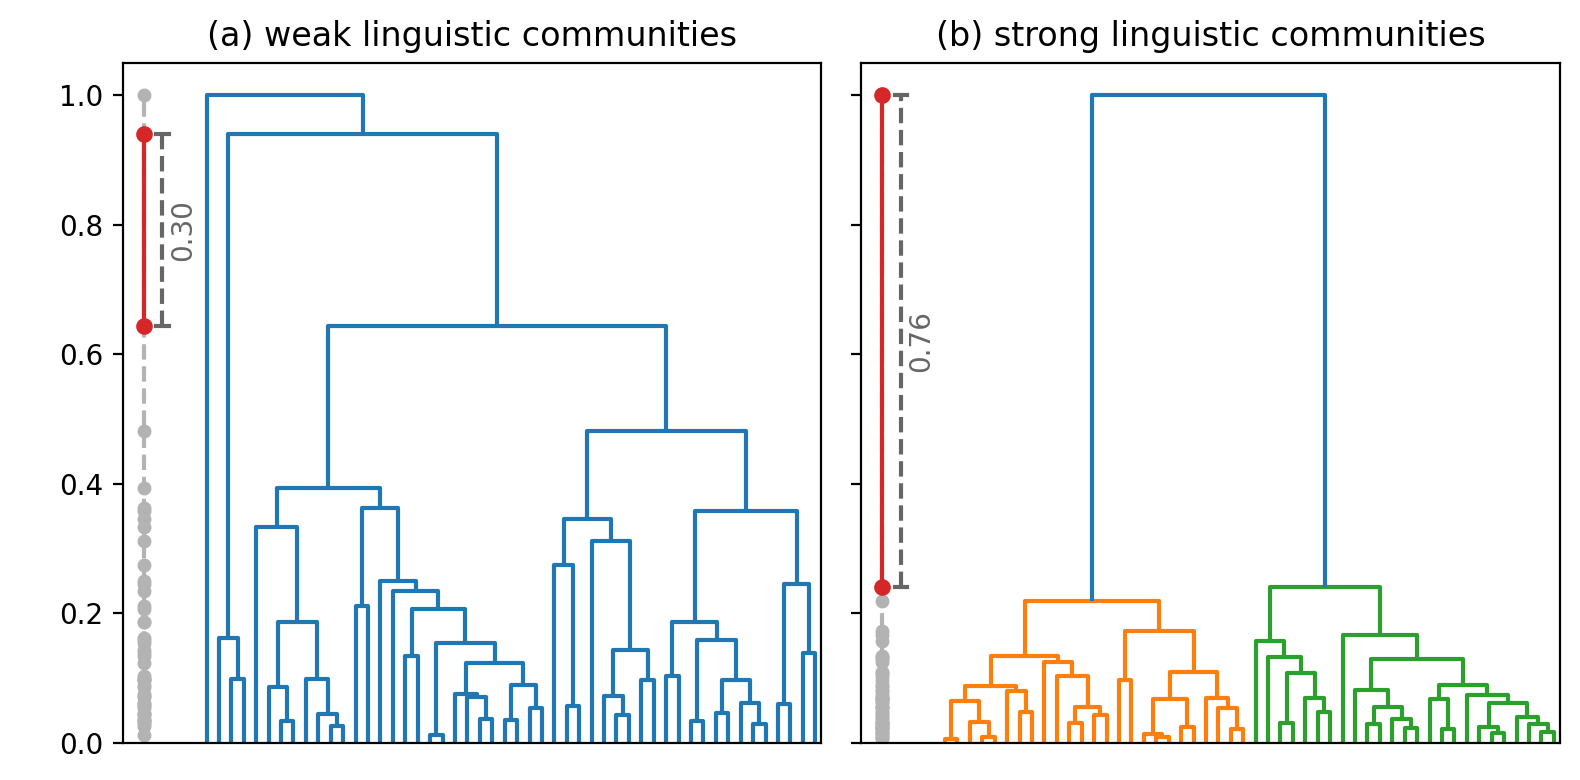

In [12]:
# ACTUAL PLOTTING

# generate random data
np.random.seed(4)
mean_a = [0, 0]
mean_b = [10, 10]
cov = [[2, 1], [1, 2]]
size = 25

a = np.random.multivariate_normal(mean_a, cov, 2*size)
b = np.random.multivariate_normal(mean_a, cov, size)
c = np.random.multivariate_normal(mean_b, cov, size)

# collect data for weak and strong plot
X_weak = a
X_strong = np.concatenate((b, c),)
Xs = [X_weak, X_strong]

titles = ["(a) weak linguistic communities", "(b) strong linguistic communities"]
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(plot_w, plot_h),
    dpi=200,
    sharey=True,
)

# do both dendrograms at once
for i in range(2):
    
    # perform clustering and plot dendrogram
    Z = hierarchy.linkage(Xs[i], method="average")
    Z = normalize_distances(Z)
    if i == 0:
        # weak clusters: one colour
        hierarchy.dendrogram(Z, no_labels=True, link_color_func=lambda x: "C0", ax=axes[i])
    else:
        # strong clusters: default colour palette
        hierarchy.set_link_color_palette(mpl_def_col_pal[1:])
        hierarchy.dendrogram(Z, no_labels=True, above_threshold_color="C0", ax=axes[i])
    
    # grey line
    dendline = Z[:,2]
    
    # x-position for grey line (11 has no special meaning, purely based on aesthetic aspects)
    line_x = -axes[i].get_xlim()[1]/11
    
    # start and end of longest segment
    l_seg = longest_segment(dendline)
    
    # recalculate limit for x-axis to fit grey line
    # (similarly to 11 above, 8 has no special meaning)
    new_xmin = -axes[i].get_xlim()[1]/8
    
    # plot grey line
    axes[i].plot(np.full(len(dendline), line_x), dendline,
             marker="o",
             markersize=4,
             linestyle="dashed",
             c="0.7",
            )
    
    # plot red longest segment
    axes[i].plot(np.full(2, line_x), l_seg,
                 marker="o",
                 markersize=5,
                 color="C3"
                )
    
    # dark grey annotation of longest segment
    ant_line_x = line_x+15
    ant_c = "0.4"
    hammer_w = 5
    hammer_x = [ant_line_x-hammer_w, ant_line_x+hammer_w]
    length = l_seg[1] - l_seg[0]
    midpoint = l_seg[1] - (length / 2)
    
    axes[i].plot(np.full(2, ant_line_x), l_seg, c=ant_c, ls="dashed")
    axes[i].plot(hammer_x, [l_seg[0], l_seg[0]], c=ant_c)
    axes[i].plot(hammer_x, [l_seg[1], l_seg[1]], c=ant_c)
    axes[i].text(ant_line_x+5, midpoint, "{:.2f}".format(length), rotation=90, ha="left", va="center", c=ant_c)
    
    # set limits and title
    axes[i].set_xlim(new_xmin)
    axes[i].set(title=titles[i])


axes[0].set(ylabel=" ")  # for correct vertical alignment with other .png in tex document
plt.tight_layout()

plt.show()